In [15]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, date

import pickle

In [16]:
twitter_file_path = "../../data/ego-twitter.p"
github_file_path = "../../data/github_users.p"

with open(twitter_file_path, 'rb') as f:
    T = pickle.load(f)

with open(github_file_path, 'rb') as f:
    Gh = pickle.load(f)

## Basic drawing of a network using NetworkX (Fixed)

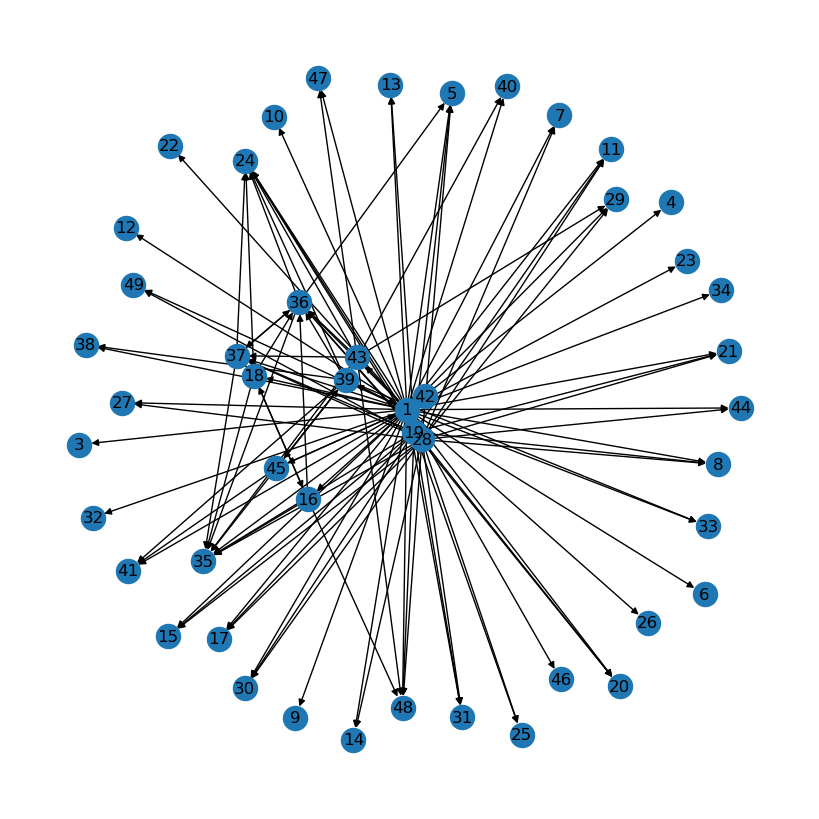

In [17]:
T_sub = nx.DiGraph()
edges_f_t = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_f_t)

plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

## Queries on a graph (Fixed)

In [18]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


## Specifying a weight on edges (Fixed)

In [19]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        d['weight'] = 1.1